In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
df_training = pd.read_csv("../data_mod/train_motion_data.csv")
df_test = pd.read_csv("../data_mod/test_motion_data.csv")

df_training


,AccX,AccY,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,NORMAL,0.000000,0.000000,0.000000,0.000000
1,-1.624864,-1.082492,NORMAL,-1.624864,-1.082492,-0.812432,-0.541246
2,-0.594660,-0.122410,NORMAL,1.030204,0.960082,-0.297330,-0.061205
3,0.738478,-0.228456,NORMAL,1.333138,-0.106046,0.369239,-0.114228
4,0.101741,0.777568,NORMAL,-0.636737,1.006023,0.050871,0.388784
...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,SLOW,2.374675,-1.824629,0.457844,-1.008745
3640,-1.934203,0.914925,SLOW,-2.849891,2.932414,-0.967102,0.457462
3641,-0.222845,0.747304,SLOW,1.711359,-0.167621,-0.111422,0.373652
3642,-0.349423,0.067261,SLOW,-0.126579,-0.680043,-0.174712,0.033630


In [137]:
df_training.isna().sum()

AccX        0
AccY        0
Class       0
DiffAccX    0
DiffAccY    0
VelX        0
VelY        0
dtype: int64

### Change categories to numbers

In [138]:
df_training = df_training.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_test = df_test.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_training


,AccX,AccY,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
1,-1.624864,-1.082492,0,-1.624864,-1.082492,-0.812432,-0.541246
2,-0.594660,-0.122410,0,1.030204,0.960082,-0.297330,-0.061205
3,0.738478,-0.228456,0,1.333138,-0.106046,0.369239,-0.114228
4,0.101741,0.777568,0,-0.636737,1.006023,0.050871,0.388784
...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,2,2.374675,-1.824629,0.457844,-1.008745
3640,-1.934203,0.914925,2,-2.849891,2.932414,-0.967102,0.457462
3641,-0.222845,0.747304,2,1.711359,-0.167621,-0.111422,0.373652
3642,-0.349423,0.067261,2,-0.126579,-0.680043,-0.174712,0.033630


### Normalize data

In [139]:
X_train = df_training.drop(columns=["Class"])
X_train = (X_train - X_train.mean()) / X_train.std() * 100

X_train["Class"] = df_training["Class"]
X_train

,AccX,AccY,DiffAccX,DiffAccY,VelX,VelY,Class
0,-4.105593,8.126800,0.010300,-0.010421,-4.105593,8.126800,0
1,-168.957027,-111.696347,-151.542377,-101.201825,-168.957027,-111.696347,0
2,-64.437130,-5.422989,96.098456,89.738101,-64.437130,-5.422989,0
3,70.817107,-17.161393,124.353421,-9.923577,70.817107,-17.161393,0
4,6.216602,94.197287,-59.378806,94.032688,6.216602,94.197287,0
...,...,...,...,...,...,...,...
3639,88.795978,-215.193071,221.498566,-170.576840,88.795978,-215.193071,2
3640,-200.341232,109.401604,-265.801873,274.111831,-200.341232,109.401604,2
3641,-26.714411,90.847295,159.630443,-15.679652,-26.714411,90.847295,2
3642,-39.556507,15.572024,-11.795809,-63.580862,-39.556507,15.572024,2


In [140]:
X_testing = df_test.drop(columns="Class")
X_testing = (X_testing - X_testing.mean()) / X_testing.std() * 100

X_testing["Class"] = df_test["Class"]
X_testing

,AccX,AccY,DiffAccX,DiffAccY,VelX,VelY,Class
0,67.345100,-9.509000,-0.021340,-0.012385,-10.948927,14.564454,1
1,57.982946,10.303100,-8.494392,16.758078,58.012497,10.295271,1
2,270.452050,-824.010358,192.270076,-706.238535,270.496822,-824.016540,1
3,229.805029,-828.171460,-36.808209,-3.534656,229.846889,-828.177633,1
4,283.133326,-732.402479,48.242495,81.053740,283.179007,-732.408842,1
...,...,...,...,...,...,...,...
3079,-84.712435,-57.627689,-73.609489,-1.097380,-84.693107,-57.635384,2
3080,145.444037,51.068429,208.277716,91.996249,145.479853,51.060520,2
3081,121.268079,-177.287100,-21.901364,-193.309813,121.302164,-177.294558,2
3082,83.265000,79.069807,-34.415357,216.987532,83.296362,79.061842,2


### Change data to percentiles

In [141]:
"""X_n_quantile = pd.DataFrame(columns=df_training.columns)

quantiles = [0.05, 0.25, 0.5, 0.75, 0.90]
columns = ["AccX", "AccY", "DiffAccX", "DiffAccY", "Class"]

for column in columns:
    data_quantiles = []
    for quan in quantiles:
        if(quan == "Class"):
            data_quantiles.append(int(X_n[column].quantile(quan)))
        else:
            data_quantiles.append(X_n[column].quantile(quan))
    
    X_n_quantile[column] = data_quantiles

X_n_quantile"""

'X_n_quantile = pd.DataFrame(columns=df_training.columns)\n\nquantiles = [0.05, 0.25, 0.5, 0.75, 0.90]\ncolumns = ["AccX", "AccY", "DiffAccX", "DiffAccY", "Class"]\n\nfor column in columns:\n    data_quantiles = []\n    for quan in quantiles:\n        if(quan == "Class"):\n            data_quantiles.append(int(X_n[column].quantile(quan)))\n        else:\n            data_quantiles.append(X_n[column].quantile(quan))\n    \n    X_n_quantile[column] = data_quantiles\n\nX_n_quantile'

### Balance data

## Train model

In [142]:
X_training  = X_train.drop(columns="Class")
y_training  = X_train.Class

X_test = X_testing.drop(columns="Class")
y_test = X_testing.Class

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [144]:
rfc = RandomForestClassifier(n_estimators=30, max_depth=15, random_state=5, criterion="entropy")
rfc.fit(X_training, y_training)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=30,
                       random_state=5)

In [145]:
rfc.score(X_training, y_training)

0.8347969264544457

In [146]:
rfc.score(X_test, y_test)

0.4383916990920882

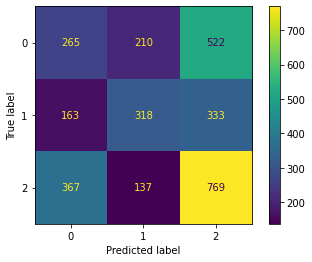

In [147]:
y_pred = rfc.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=CM,
                       display_labels=rfc.classes_)
display.plot()


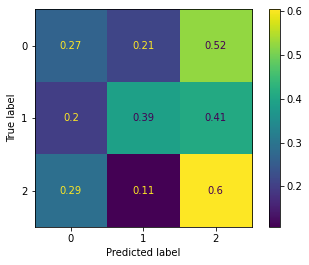

In [148]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")
display = ConfusionMatrixDisplay(confusion_matrix=CM_norm,
                       display_labels=rfc.classes_)
display.plot()

In [149]:
rfc.score(X_test, y_test)

0.4383916990920882

In [150]:
rfc_imp = pd.DataFrame(rfc.feature_importances_, columns=['importance'])

In [151]:
rfc_imp['importance'] = rfc_imp['importance'] * 100
rfc_imp = rfc_imp.set_index(X_training.columns)
rfc_imp


,importance
AccX,15.898940
AccY,16.420162
DiffAccX,16.700714
DiffAccY,18.298118
VelX,16.057796
VelY,16.624269


In [152]:
rfc_imp.sort_values(by='importance', ascending=False)

,importance
DiffAccY,18.298118
DiffAccX,16.700714
VelY,16.624269
AccY,16.420162
VelX,16.057796
AccX,15.898940


### Train model with RandomSearchCV

In [153]:
n_estimators = np.arange(2, 200, 2)

max_features = ['sqrt', None]

max_depth = [int(x) for x in np.linspace(5, 20, num = 20)]
max_depth.append(None)

min_samples_split = np.arange(2, 10)

min_samples_leaf = np.arange(1, 4)

bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [154]:
weights = {0:1.05, 1:1.05, 2:1}
random_forest = RandomForestClassifier(random_state=0, criterion="entropy", min_impurity_decrease=0, class_weight=weights)

param_grid = {'n_estimators': np.arange(2, 40, 2), 'max_depth': np.arange(3, 30), 'max_leaf_nodes': np.arange(6, 30, 2), 'min_samples_leaf': np.arange(1, 4)}

# best_params: test 47.5% {'max_depth': 7, 'n_estimators': 33}

# AccY, AccX, GyroZ, GyroX
# best params 2 : test 47% {'n_estimators': 96, 'min_samples_split': 3 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5,'bootstrap': False}

random_gscv = RandomizedSearchCV(random_forest, random_grid, n_iter=400, cv=5, verbose=10, n_jobs=10, random_state=0)
random_gscv.fit(X_training, y_training)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5; 1/400] START bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=7, n_estimators=108
[CV 2/5; 1/400] START bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=7, n_estimators=108
[CV 3/5; 1/400] START bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=7, n_estimators=108
[CV 4/5; 1/400] START bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=7, n_estimators=108
[CV 5/5; 1/400] START bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=7, n_estimators=108
[CV 2/5; 2/400] START bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=16
[CV 4/5; 2/400] START bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=16
[CV 1/5; 2/400] STAR

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight={0: 1.05,
                                                                  1: 1.05,
                                                                  2: 1},
                                                    criterion='entropy',
                                                    min_impurity_decrease=0,
                                                    random_state=0),
                   n_iter=400, n_jobs=10,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 5, 6, 7, 8, 8, 9, 10,
                                                      11, 12, 12, 13, 14, 15,
                                                      16, 16, 17, 18, 19, 20,
                                                      None],
                                        'max_features': ['sqrt', None],
                                        'min_samples_leaf': array([1, 2, 3]...
                                        'n_estimators': array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130,
       132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156,
       158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182,
       184, 186, 188, 190, 192, 194, 196, 198])},
                   random_state=0, verbose=10)

In [155]:
random_gscv.best_params_

{'n_estimators': 40,
 'min_samples_split': 9,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 12,
 'bootstrap': True}

In [156]:
random_gscv.best_score_

0.43029929604003686

In [157]:
random_gscv.score(X_training, y_training)

0.7058177826564215

In [158]:
random_gscv.score(X_test, y_test)

0.44325551232166016

In [159]:
classes = ["NORMAL", "AGGRESIVE", "SLOW"]

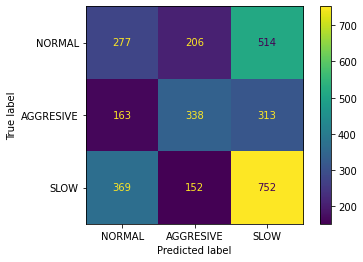

In [160]:
y_pred = random_gscv.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=CM,
                       display_labels=classes)
display.plot()

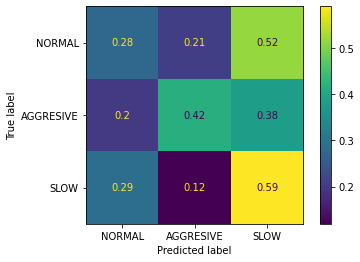

In [161]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")
display = ConfusionMatrixDisplay(confusion_matrix=CM_norm,
                       display_labels=classes)
display.plot()

#### Evaluate improvment

In [163]:
def evaluate(model, test_features, test_labels):
    accuracy = model.score(test_features, test_labels)
    print('Model Performance')
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state=0, criterion="entropy", min_impurity_decrease=0, class_weight=weights)
base_model.fit(X_training, y_training)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = random_gscv.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print(f'Improvement of {100 * (random_accuracy - base_accuracy) / base_accuracy:.3f}%.')

Model Performance
Accuracy = 0.397%.
Model Performance
Accuracy = 0.443%.
Improvement of 11.774%.
